In [70]:
import torch
from torch.utils.data import Dataset ,random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [71]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable


In [72]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [73]:
import torch
from torch.autograd import grad
import torch.nn.functional as F
import torch.nn as nn
import pickle

In [74]:
torch.manual_seed(38)

In [75]:
from torchvision.transforms import v2
from PIL import ImageFile

In [76]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [77]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [78]:
from torchvision.datasets import ImageFolder
from PIL import Image

# Используйте этот класс для создания dataset:
# train_dataset = SafeImageFolder(train_dir, transform=transform)

In [81]:
from torchvision.transforms import v2
# Определите преобразования для изображений
transform = v2.Compose([
    v2.RandomResizedCrop(size=(28)),
    v2.ToDtype(torch.float32, scale=True),
    v2.ToTensor()
])
dataset=ImageFolder("data/Mushrooms",transform=transform)

C:\Users\polur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


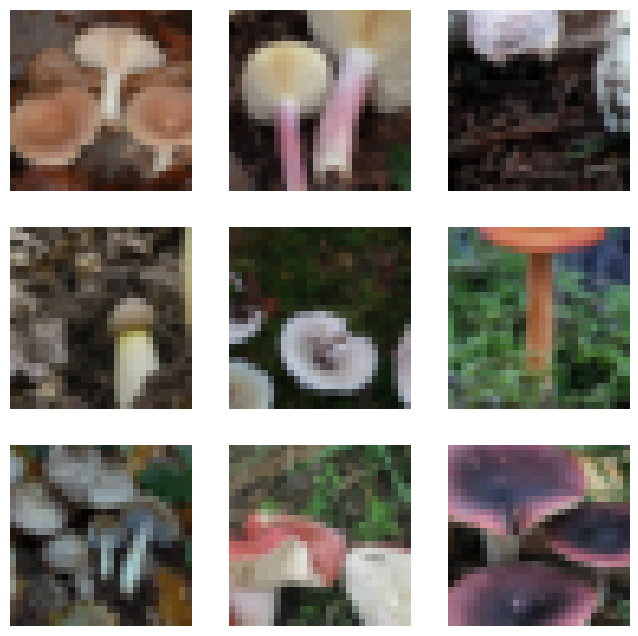

In [82]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.permute(1,2,0))
plt.show()



In [44]:
img, label =dataset[0]
type(img)

torch.Tensor

In [84]:
def build_AlexNET():
    def init_weights(m):
        if type(m) == torch.nn.Linear:
            torch.nn.init.xavier_uniform_(m.weight)
            m.bias.data.fill_(0.01)
        if type(m) == torch.nn.Conv2d:
            torch.nn.init.xavier_uniform_(m.weight)
        
    net = torch.nn.Sequential(
        torch.nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=2),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2), 
        
        torch.nn.Conv2d(64, 192, kernel_size=3, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2), 
        
        torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
        torch.nn.ReLU(),
        torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
        torch.nn.ReLU(),
        torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2),
        
        torch.nn.Flatten(),
        torch.nn.Linear(256*3*3, 4000),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(4000, 4000),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(4000, 9)
    )

    net.apply(init_weights)
    return net
alexnet = build_AlexNET()
print(alexnet)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=2304, out_features=4000, bias=True)
  (15): ReLU()
  (16): Dropout(p=0.5, inplace=False)
  (17): Linear(in_features=4000, out_features=4000, bias=True)
  (18): ReLU()
  (19): Dropout(p=0.5, inplace=False)
  (20): Linear(in_feature

In [ ]:
def build_AlexNET():
    def init_weights(m):
        if type(m) == torch.nn.Linear:
            torch.nn.init.xavier_uniform_(m.weight)
            m.bias.data.fill_(0.01)
        if type(m) == torch.nn.Conv2d:
            torch.nn.init.xavier_uniform_(m.weight)
        
    net = torch.nn.Sequential(
        torch.nn.Conv2d(3, 96, kernel_size=11, stride=4),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=2), 
        
        torch.nn.Conv2d(96, 256, kernel_size=5, padding=2),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=2), 
        
        torch.nn.Conv2d(256, 384, kernel_size=3, padding=1),
        torch.nn.ReLU(),
        torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
        torch.nn.ReLU(),
        torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=2),
        
        torch.nn.Flatten(),
        torch.nn.Linear(256*5*5, 4096),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(4096, 4096),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(4096, 9)
    )

    net.apply(init_weights)
    return net
alexnet = build_AlexNET()
print(alexnet)

Sequential(
  (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=6400, out_features=4096, bias=True)
  (15): ReLU()
  (16): Dropout(p=0.5, inplace=False)
  (17): Linear(in_features=4096, out_features=4096, bias=True)
  (18): ReLU()
  (19): Dropout(p=0.5, inplace=False)
  (20): Linear(in_features=4096, out_fe

In [60]:
len(dataset)

6714

In [85]:
train_size=int(len(dataset)*0.9)
test_size=len(dataset)-train_size

In [86]:
train_data, test_data=random_split(dataset,[train_size,test_size])

In [87]:
train_dataloader= torch.utils.data.DataLoader(
    train_data, batch_size=512, shuffle =True, num_workers=8)
test_dataloader =torch.utils.data.DataLoader(
    test_data,batch_size=512,shuffle=False,num_workers=8)


In [88]:
from torch import optim
from tqdm import tqdm

In [89]:
# define a train function, model-agnostic, which will be used for further training
def train(net, train_loader, device, num_epochs, learning_rate):
    
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    loss_function = torch.nn.CrossEntropyLoss()
    acc_history = []
    with tqdm(total=len(train_loader)*num_epochs, position=0, leave=True) as pbar:

        for epoch in range(num_epochs):
            running_loss = 0.0
            correct = 0
            total = 0 
            
            for batch_num, (inputs, labels) in enumerate(train_loader):
                try:
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    
                    optimizer.zero_grad()
                    outputs = net(inputs)
                    loss = loss_function(outputs, labels)

                    # Backpropagation                
                    loss.backward()

                    # Update
                    optimizer.step()

                    # Print progress
                    running_loss += loss.item()

                    # Calculate batch Accuracy
                    _, predicted = outputs.max(1)
                    batch_total = labels.size(0)
                    batch_correct = predicted.eq(labels).sum().item()
                    batch_acc = batch_correct/batch_total
                    
                    pbar.set_description("Epoch: %d, Batch: %2d, Loss: %.2f, Acc: %.2f" % (epoch, batch_num, running_loss, batch_acc))
                    pbar.update()

                    total += batch_total
                    correct += batch_correct
                except Exception as e:
                    print(f"Error in batch {batch_num}: {e}")
                    continue
            # Print the evaluation metric and reset it for the next epoch
            acc = correct/total 
            acc_history.append(acc)

        pbar.close()

    return acc_history



In [90]:
# prepare training
BATCH_SIZE = 512
EPOCHS = 10
LR = 0.001
device='cpu'
net=alexnet

hist = train(net, train_dataloader, device, EPOCHS, LR)

Epoch: 0, Batch:  4, Loss: 10.98, Acc: 0.11:   4%|▍         | 5/120 [00:31<12:12,  6.37s/it]


OSError: Caught OSError in DataLoader worker process 5.
Original Traceback (most recent call last):
  File "C:\Users\polur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torch\utils\data\_utils\worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "C:\Users\polur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torch\utils\data\_utils\fetch.py", line 50, in fetch
    data = self.dataset.__getitems__(possibly_batched_index)
  File "C:\Users\polur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torch\utils\data\dataset.py", line 416, in __getitems__
    return [self.dataset[self.indices[idx]] for idx in indices]
            ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^
  File "C:\Users\polur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\datasets\folder.py", line 245, in __getitem__
    sample = self.loader(path)
  File "C:\Users\polur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\datasets\folder.py", line 284, in default_loader
    return pil_loader(path)
  File "C:\Users\polur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\datasets\folder.py", line 264, in pil_loader
    return img.convert("RGB")
           ~~~~~~~~~~~^^^^^^^
  File "C:\Users\polur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\PIL\Image.py", line 972, in convert
    self.load()
    ~~~~~~~~~^^
  File "C:\Users\polur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\PIL\ImageFile.py", line 391, in load
    raise OSError(msg)
OSError: image file is truncated (92 bytes not processed)


In [ ]:
def print_history(history, title):
    plt.figure(figsize=(7, 4))
    plt.plot(history)
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

In [ ]:
print_history(hist, "СNN Model Accuracy")

In [ ]:
def evaluate_acc(net, test_loader, device='cpu'):

    total = 0
    correct = 0
    
    for batch_num, (inputs, labels) in enumerate(test_loader):
        # Possibly copy inputs and labels to the GPU
        inputs = inputs.permute(0, 1, 3,2).to(device)
        labels = labels.to(device)
        
        outputs = net(inputs)        
        _, predicted = outputs.max(1)
        
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
    acc = correct/total
    return acc


In [ ]:
acc=evaluate_acc(alexnet,test_dataloader)

In [ ]:
acc